In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


# Navigate to the project directory
%cd '/content/drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/'

dataset_path = '/content/drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Fraction_Detection_Dataset'

Mounted at /content/drive/
/content/drive/MyDrive/Project_Experiments/Bone_Fraction_Detection


In [1]:
import os
import random
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
train_images_dir = os.path.join(dataset_path, "train/images")  # Train images directory
train_labels_dir = os.path.join(dataset_path, "train/labels")
train_image_files = sorted([f for f in os.listdir(train_images_dir) if f.endswith('.jpg')])
train_label_files = sorted([f for f in os.listdir(train_labels_dir) if f.endswith('.txt')])

In [ ]:
# Function to display an image
def show_image(image_path):
    """
    Display an image using Matplotlib.
    Args:
        image_path (str): Path to the image file.
    """
    image = cv2.imread(image_path)  # Load the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB (Matplotlib)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.title(f"Image: {os.path.basename(image_path)}")
    plt.show()

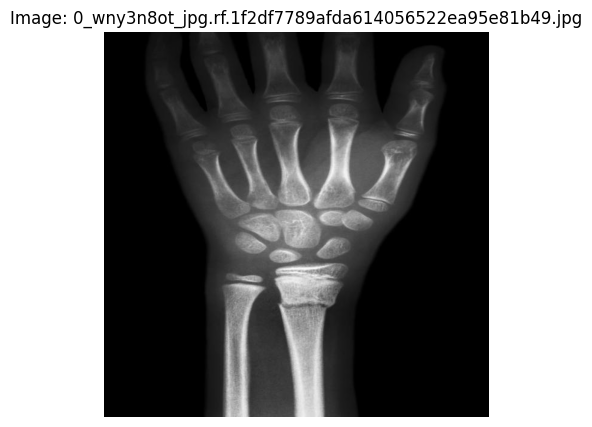

In [ ]:
sample_image_path = os.path.join(train_images_dir, train_image_files[0])
show_image(sample_image_path)

In [ ]:

def class_conversion(in_dir, out_dir, txt_file):
  boxes = []
  with open(os.path.join(in_dir,txt_file), 'r') as f:
          for line in f:
              data = line.strip().split()
              class_id = int(data[0])
              if class_id==1:
                data[0] = '0'
                boxes.append(data)

  with open(os.path.join(out_dir,txt_file), 'w') as f_out:
      for box in boxes:
          f_out.write(' '.join(map(str, box)) + '\n')



In [ ]:
in_dir = os.path.join(dataset_path, "test/labels")
out_dir = os.path.join(dataset_path, "test/labels_conv")

for txt_file in sorted([f for f in os.listdir(in_dir) if f.endswith('.txt')]):
  class_conversion(in_dir, out_dir, txt_file)

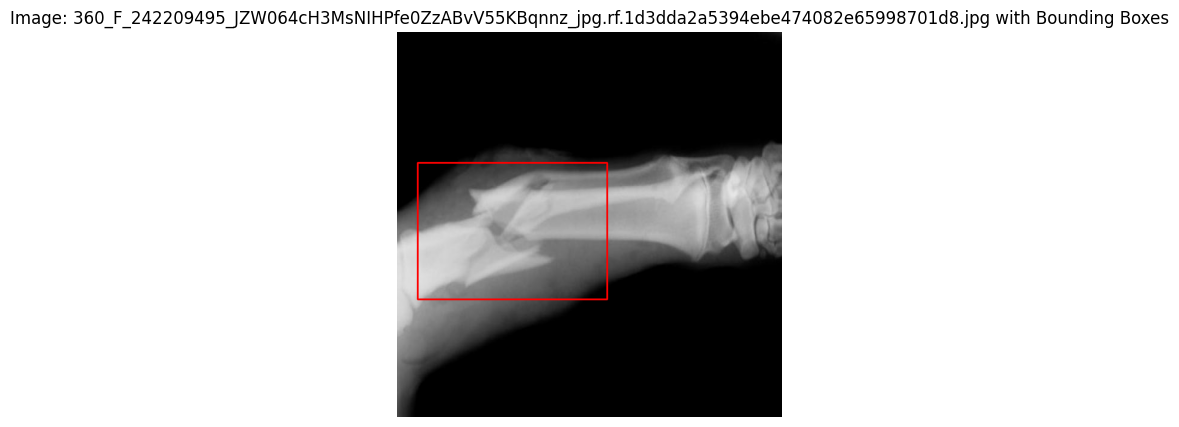

In [ ]:
def load_yolo_annotations(txt_file, image_width, image_height):
    """
    Load YOLO annotations and convert them to pixel coordinates.
    Args:
        txt_file (str): Path to the YOLO `.txt` annotation file.
        image_width (int): Width of the image in pixels.
        image_height (int): Height of the image in pixels.
    Returns:
        List of bounding boxes in pixel coordinates.
        Each box: (class_id, x_min, y_min, width_pixel, height_pixel)

    """
    boxes = []
    with open(txt_file, 'r') as f:
        for line in f:
            data = line.strip().split()
            class_id = int(data[0])
            x_center, y_center, width, height = map(float, data[1:])

            # Convert normalized YOLO coordinates to pixel coordinates
            x_center_pixel = int(x_center * image_width)
            y_center_pixel = int(y_center * image_height)
            width_pixel = int(width * image_width)
            height_pixel = int(height * image_height)

            # Calculate top-left corner
            x_min = int(x_center_pixel -  width_pixel/ 2)
            y_min = int(y_center_pixel -  height_pixel/ 2)
            boxes.append((class_id, x_min, y_min, width_pixel, height_pixel))

    return boxes



def visualize_image_with_boxes(train_images_dir, annotation_path):
    """
    Visualize an image with YOLOv8 bounding boxes.
    Args:
        image_path (str): Path to the image file.
        annotation_path (str): Path to the YOLO annotation file.
    """
    # Load image
    image = cv2.imread(train_images_dir)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image_height, image_width = image.shape[:2]

    # Load YOLO annotations
    boxes = load_yolo_annotations(annotation_path, image_width, image_height)

    # Draw bounding boxes on the image
    for box in boxes:
        class_id, x_min, y_min, width_pixel, height_pixel = box
        # Draw rectangle (bounding box)
        cv2.rectangle(image, (x_min, y_min), (x_min + width_pixel, y_min + height_pixel), color=(255, 0, 0), thickness=2)

    # Display the image with bounding boxes
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.title(f"Image: {os.path.basename(train_images_dir)} with Bounding Boxes")
    plt.show()

# Test the visualization with the first image and annotation
img_index=15
sample_image_path = os.path.join(train_images_dir, train_image_files[img_index])
sample_label_path = os.path.join(train_labels_dir, os.path.splitext(train_image_files[img_index])[0] + '.txt')
visualize_image_with_boxes(sample_image_path, sample_label_path)



In [ ]:

# Build the full path to the label file
label_filename = "An-x-ray-showing-the-metacarpal-bone-fracture-at-right-fifth-bone-of-the-patient-on-the_png.rf.0059481de1358d2e2f1f9f6e347a52af.txt"  # adjust extension if needed
sample_label_path = os.path.join(train_labels_dir, label_filename)

# Now you can open and read the label file
with open(sample_label_path, 'r') as f:
    label_data = f.read()

print(label_data)


0 0.42109375 0.5328125 0.715625 0.93359375
